<a href="https://colab.research.google.com/github/maycmesquia/analise_ENEM_2019/blob/main/Enem_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analise do Enem 2019
Pequena analise do ENEM ano 2019

## Preparando o ambiente para execução
Importando blibiotecas necessarias e abrindo arquivo para criação do DataFrame: **df_microDados**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set()

## Preparando o arquivo:
Como o arquivo do ENEM 2019 é razoavelmente grande optei por importar somente as colunas que irei utilizar, sabendo que a cada analise as colunas que precisaria seriam diferentes criei uma função "data" que recebe uma lista com as colunas que desejo utilisar na analise, e a função me retorna o Dataframe que será utilisado na analise, assim economizando memoria.

In [ ]:
def data(colunas):
    arquivo = '/content/drive/MyDrive/Colab Notebooks/Outros pessoais/ENEM/MICRODADOS_ENEM_2019.csv'
    return pd.read_csv(arquivo, sep=';', encoding='ISO-8859-1', usecols=colunas)


## Quantidade de inscritos por estado

In [ ]:
colunas = ['SG_UF_RESIDENCIA']
df_enem = data(colunas).value_counts()
df_enem

SG_UF_RESIDENCIA
SP                  813772
MG                  538896
BA                  398095
RJ                  338710
CE                  295870
PA                  281518
PE                  271727
MA                  219673
RS                  218763
PR                  210080
GO                  170147
PB                  147780
PI                  121181
RN                  119179
AM                  118087
SC                  109515
ES                  102435
DF                   94352
AL                   91707
MT                   88349
SE                   75895
MS                   70157
RO                   58885
TO                   47181
AP                   42140
AC                   38229
RR                   12947
dtype: int64

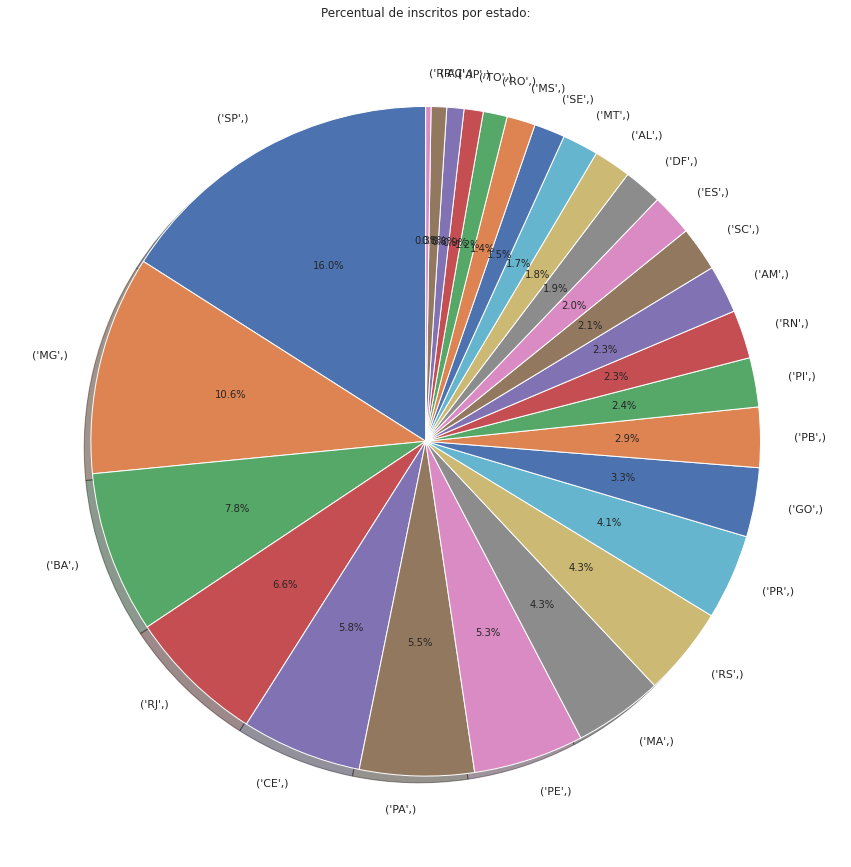

In [ ]:
plt.figure(figsize=(15,25))
plt.title('Percentual de inscritos por estado:')
plt.pie(df_enem, 
        labels=df_enem.index, 
        autopct='%1.1f%%', 
        shadow=True, startangle=90);

## Situação socio-economica dos faltantes ou desistentes
No questionario socio-economico do ENEM é informado a média da renda familiar, com isso verifiquei onde se concentram a maior parte dos desistentes e faltantes.

Já que o ENEM é a unica forma de ingressar nas universidades publicas federais, e é atraves dele tambem que é realizado a analise para o financiamento estudantil nas faculdades e universidades privadas, os estudantes que faltaram ao certame ficaram impedidos de usufruirem do das duas modalidades para ingresso em curso superior.


In [ ]:
colunas = ['TP_PRESENCA_CN', 'TP_PRESENCA_CH','TP_PRESENCA_LC','TP_PRESENCA_MT', 'IN_TREINEIRO', 'Q001', 'Q002', 'Q006']

df_enem = data(colunas)

df_enem.head()

,IN_TREINEIRO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,Q001,Q002,Q006
0,0,0,0,0,0,B,B,A
1,0,0,0,0,0,C,E,C
2,0,0,0,0,0,E,E,B
3,0,1,1,1,1,C,E,E
4,0,1,1,1,1,E,E,G


In [ ]:
df_enem = df_enem[df_enem['IN_TREINEIRO']==0]

df_enem = df_enem[  (df_enem['TP_PRESENCA_CN']==0) | 
                    (df_enem['TP_PRESENCA_CH']==0) |
                    (df_enem['TP_PRESENCA_LC']==0) |
                    (df_enem['TP_PRESENCA_MT']==0)  ]

rendas={ 'A':	'Nenhuma renda.',
        'B':	'Até R$ 998,00.',
        'C':	'De R$ 998,01 até R$ 1.497,00.',
        'D':	'De R$ 1.497,01 até R$ 1.996,00.',
        'E':	'De R$ 1.996,01 até R$ 2.495,00.',
        'F':	'De R$ 2.495,01 até R$ 2.994,00.',
        'G':	'De R$ 2.994,01 até R$ 3.992,00.',
        'H':	'De R$ 3.992,01 até R$ 4.990,00.',
        'I':	'Maior que R$ 4.990,01',
        'J':	'Maior que R$ 4.990,01',
        'K':	'Maior que R$ 4.990,01',
        'L':	'Maior que R$ 4.990,01',
        'M':	'Maior que R$ 4.990,01',
        'N':	'Maior que R$ 4.990,01',
        'O':	'Maior que R$ 4.990,01',
        'P':	'Maior que R$ 4.990,01',
        'Q':	'Maior que R$ 4.990,01'}

df_renda = df_enem['Q006'].map(rendas).value_counts()

df_renda

De R$ 998,01 até R$ 1.497,00.      388546
Até R$ 998,00.                     357222
De R$ 1.497,01 até R$ 1.996,00.    135670
De R$ 1.996,01 até R$ 2.495,00.    123186
Maior que R$ 4.990,01               82283
Nenhuma renda.                      68653
De R$ 2.994,01 até R$ 3.992,00.     62808
De R$ 2.495,01 até R$ 2.994,00.     50102
De R$ 3.992,01 até R$ 4.990,00.     33896
Name: Q006, dtype: int64

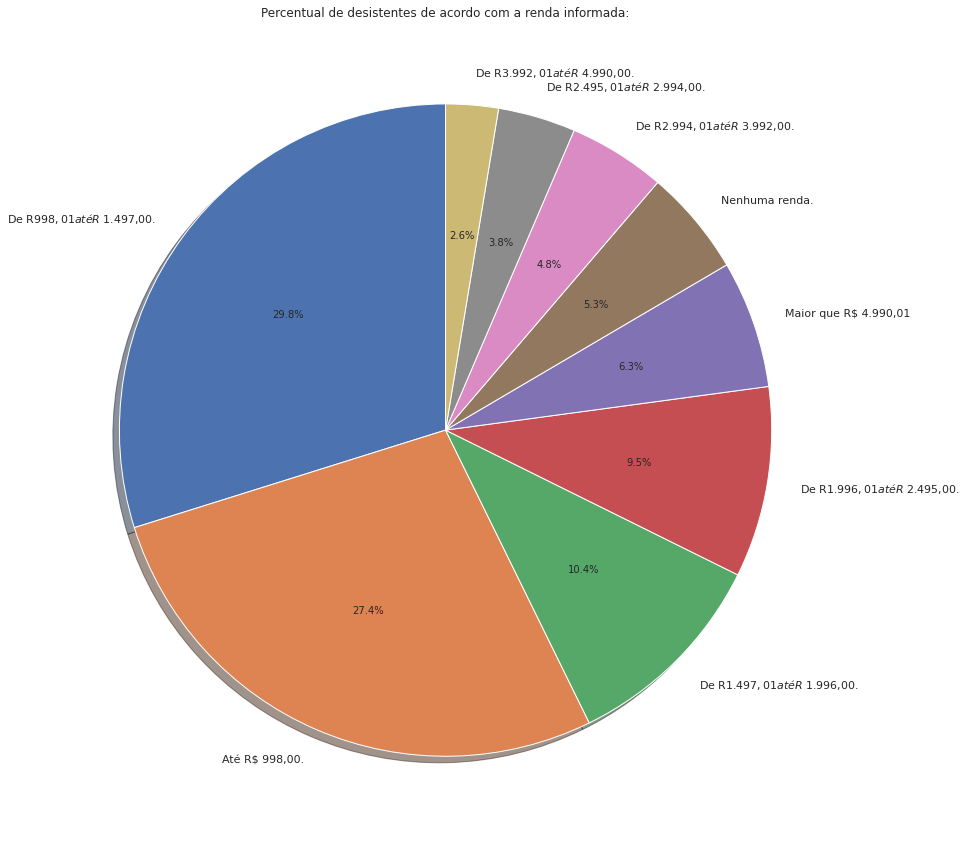

In [ ]:
plt.figure(figsize=(15,15))
plt.title('Percentual de desistentes de acordo com a renda informada:')
plt.pie(df_renda, 
        labels=df_renda.index, 
        autopct='%1.1f%%', 
        shadow=True, startangle=90);

In [ ]:
formacao = {
    'A':	'Nunca estudou.',
    'B':	'Não completou a 4ª série/5º ano do Ensino Fundamental.',
    'C':	'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.',
    'D':	'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.',
    'E':	'Completou o Ensino Médio, mas não completou a Faculdade.',
    'F':	'Completou a Faculdade, mas não completou a Pós-graduação.',
    'G':	'Completou a Pós-graduação.',
    'H':	'Não sei.',
            }

df_formacao_pai = df_enem['Q001'].map(formacao).value_counts()
df_formacao_mae = df_enem['Q002'].map(formacao).value_counts()

df_formacao_mae

Completou o Ensino Médio, mas não completou a Faculdade.                                   368121
Não completou a 4ª série/5º ano do Ensino Fundamental.                                     293723
Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.    203807
Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.       179706
Completou a Faculdade, mas não completou a Pós-graduação.                                   85157
Nunca estudou.                                                                              71572
Completou a Pós-graduação.                                                                  55210
Não sei.                                                                                    45070
Name: Q002, dtype: int64

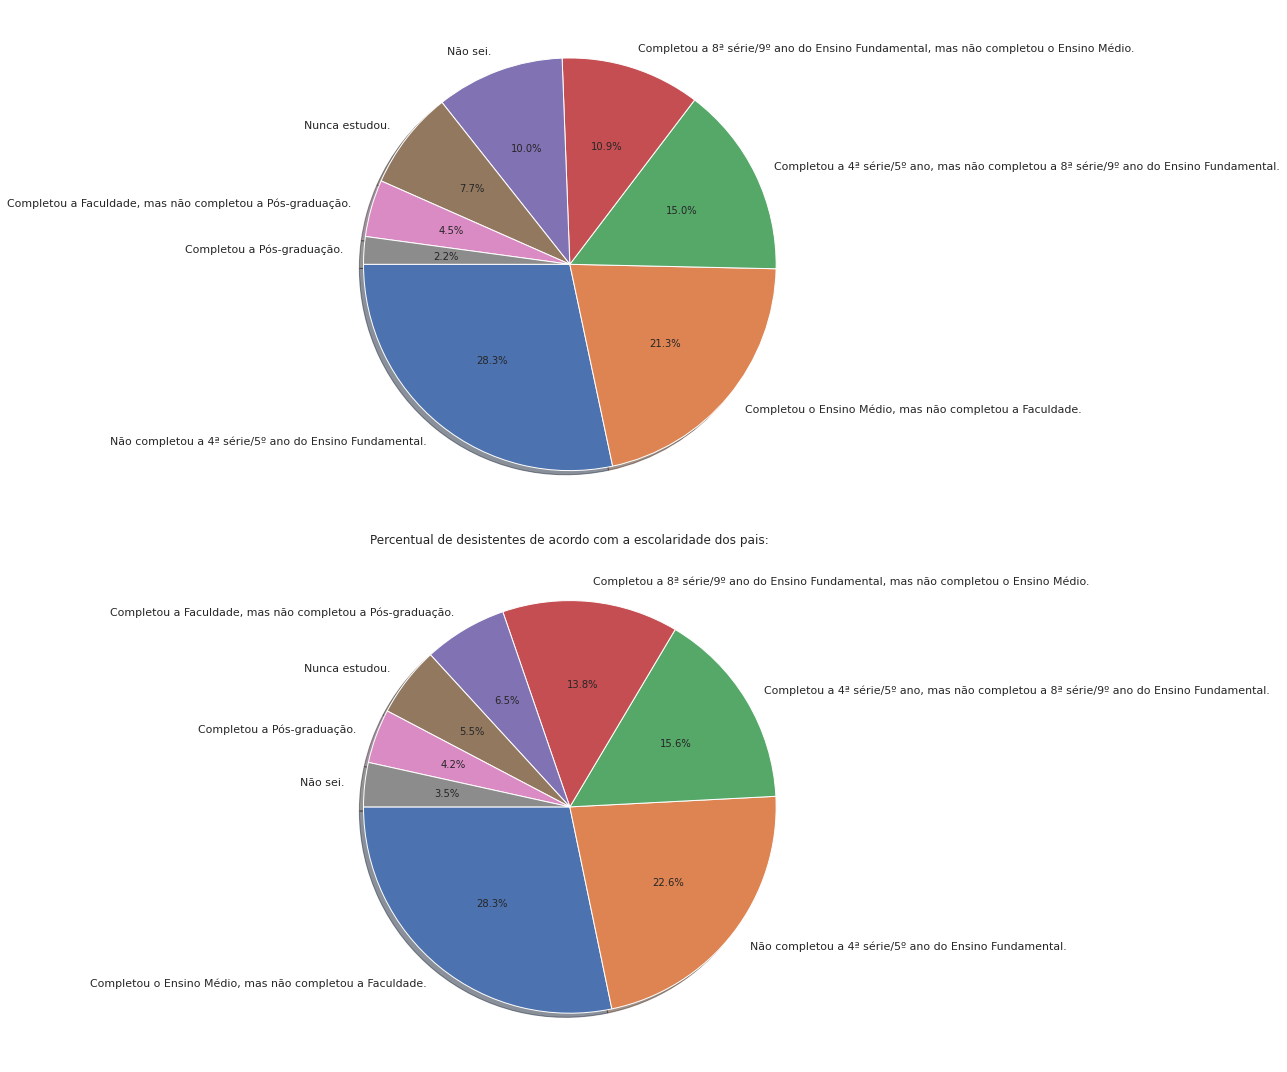

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15,15))
plt.title('Percentual de desistentes de acordo com a escolaridade dos pais:')

ax1.pie(df_formacao_pai, labels=df_formacao_pai.index, autopct='%1.1f%%', shadow=True, startangle=180)
ax2.pie(df_formacao_mae, labels=df_formacao_mae.index, autopct='%1.1f%%', shadow=True, startangle=180)

plt.tight_layout()

## Média das notas por estado

Para calcular a média irei limpar o arquivo original, retirando os dados dos alunos que faltaram a qualquer dia das provas!

In [ ]:
colunas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
df_enem2019.dropna(subset= colunas, inplace=True)
df_enem2019

,NU_INSCRICAO,TP_SEXO,TP_COR_RACA,TP_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
3,190001199383,F,1,1,NaN,NaN,NaN,NaN,1,1,1,1,483.8,503.6,537.3,392.0,460.0
4,190001237802,F,1,1,NaN,NaN,NaN,NaN,1,1,1,1,513.6,575.5,570.7,677.0,860.0
5,190001782198,M,2,1,NaN,NaN,NaN,NaN,1,1,1,1,563.7,644.9,564.2,675.3,800.0
6,190001421548,F,3,1,NaN,NaN,NaN,NaN,1,1,1,1,484.6,488.4,507.2,594.7,600.0
9,190001592266,M,1,2,NaN,NaN,NaN,NaN,1,1,1,1,543.9,548.1,502.5,480.7,400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095257,190005806801,M,1,1,NaN,NaN,NaN,NaN,1,1,1,1,391.2,427.3,497.3,531.1,540.0
5095259,190005679853,F,4,1,NaN,NaN,NaN,NaN,1,1,1,1,414.6,485.9,406.6,423.4,480.0
5095260,190005863627,F,1,2,NaN,NaN,NaN,NaN,1,1,1,1,370.3,407.4,506.7,390.7,460.0
5095263,190005771624,F,3,1,NaN,NaN,NaN,NaN,1,1,1,1,499.6,507.8,537.0,498.3,540.0


Calculando a média nacional por area do Enem

In [ ]:
df_enem2019[colunas].mean()

NU_NOTA_CN         477.883272
NU_NOTA_CH         509.890593
NU_NOTA_LC         522.396600
NU_NOTA_MT         523.185098
NU_NOTA_REDACAO    579.769406
dtype: float64

In [ ]:
df_graf = df_enem2019.groupby(by=['SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC'], as_index=False)['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO'].mean().copy()
#int(df_graf['TP_DEPENDENCIA_ADM_ESC'])
df_graf

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,AC,1.0,500.735154,514.979206,528.036215,539.725178,650.233645
1,AC,2.0,442.952998,471.637962,492.519424,477.782951,529.788282
2,AC,3.0,417.300000,464.357143,453.957143,429.316667,431.428571
3,AC,4.0,531.280909,570.809036,560.498494,593.617576,791.445783
4,AL,1.0,510.050164,537.863542,545.193924,580.371550,679.560440
...,...,...,...,...,...,...,...
101,SP,4.0,549.679569,574.826283,572.698506,637.902500,703.742762
102,TO,1.0,510.690057,537.948174,544.355337,563.348295,662.387640
103,TO,2.0,441.506271,465.781507,487.022814,478.708635,533.322519
104,TO,3.0,390.375000,403.925000,433.200000,405.400000,420.000000


In [ ]:
df_graf

,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,AC,1.0,500.735154,514.979206,528.036215,539.725178,650.233645
1,AC,2.0,442.952998,471.637962,492.519424,477.782951,529.788282
2,AC,3.0,417.300000,464.357143,453.957143,429.316667,431.428571
3,AC,4.0,531.280909,570.809036,560.498494,593.617576,791.445783
4,AL,1.0,510.050164,537.863542,545.193924,580.371550,679.560440
...,...,...,...,...,...,...,...
101,SP,4.0,549.679569,574.826283,572.698506,637.902500,703.742762
102,TO,1.0,510.690057,537.948174,544.355337,563.348295,662.387640
103,TO,2.0,441.506271,465.781507,487.022814,478.708635,533.322519
104,TO,3.0,390.375000,403.925000,433.200000,405.400000,420.000000


## Sequencia da analise

- Preparação do ambiente

- Importação dos dados das amostras

- Calculo das médias gerais por área de conhecimento

- Calculo das médias gerais por estado (residencial)

- Calculo das médias gerais por estado (localização da escola)

- Analise da situação socio-economica dos alunos que faltaram alguma das provas

https://colab.research.google.com/drive/1ufIFtQeGyrxipH3z6DLTbABLuj1sKg8R#scrollTo=j-qNUn_Mu_cJ&line=1&uniqifier=1